In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
tqdm.pandas()
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv('../data/raw/teknofest_train_final.csv', sep="|")

## Etiket Dağılımı

In [3]:
df.target.value_counts()

OTHER        3616
INSULT       2419
PROFANITY    2398
SEXIST       2112
RACIST       2072
Name: target, dtype: int64

In [4]:
df.target.value_counts(normalize=True)

OTHER        0.286597
INSULT       0.191725
PROFANITY    0.190061
SEXIST       0.167393
RACIST       0.164223
Name: target, dtype: float64

## Cümle Uzunluğu

In [5]:
df['text_len'] = df.text.progress_apply(lambda x: len(x))
df['word_len'] = df.text.progress_apply(lambda x: len(x.split()))

  0%|          | 0/12617 [00:00<?, ?it/s]

  0%|          | 0/12617 [00:00<?, ?it/s]

<AxesSubplot: >

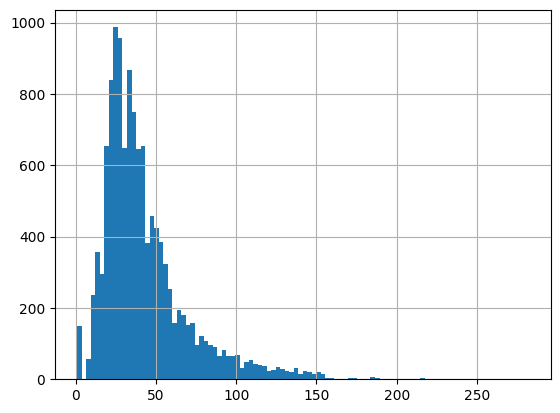

In [6]:
df.text_len.hist(bins=100)

<AxesSubplot: >

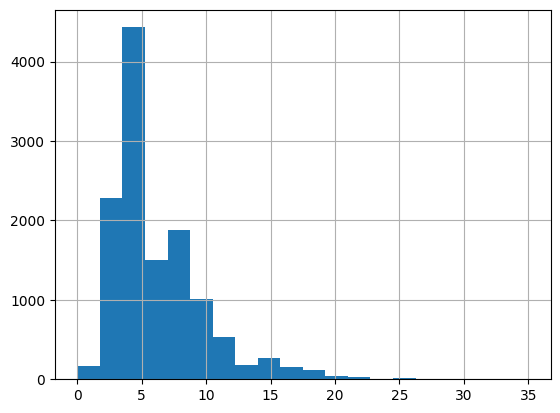

In [7]:
df.word_len.hist(bins=20)

In [8]:
df.groupby(['target']).agg({'text_len':['min', 'max', 'mean']})

text_len                
               min  max       mean
target                            
INSULT           1  114  31.209177
OTHER            1  282  60.758020
PROFANITY        1  186  33.957048
RACIST           1  185  42.541506
SEXIST           1  172  37.066288

In [9]:
df.groupby(['target']).agg({'word_len':['min', 'max', 'mean']})

word_len              
               min max      mean
target                          
INSULT           0  17  4.751550
OTHER            0  35  8.301438
PROFANITY        0  25  5.014178
RACIST           0  26  5.840734
SEXIST           0  26  5.520833

In [10]:
df[df["text_len"]<3]

,id,text,is_offensive,target,text_len,word_len
12340,e2d954b7-266d-43be-845e-015a8ecf1241,j,0,RACIST,1,1
12341,697c1629-d4f6-4e85-87f6-3fa5510f55cf,k,1,RACIST,1,1
12342,f760cf45-ad05-46e7-9971-2b515decae97,e,1,RACIST,1,1
12343,03307826-defb-4e34-aa5a-b74ca74c84c2,e,0,RACIST,1,1
12344,42bf5d9d-48ab-489f-a673-d6d792f97eb9,b,0,SEXIST,1,1
12345,301fb255-2415-4f25-8607-081540724eaa,,1,OTHER,1,0
12346,1862ce11-f4b8-40c2-9930-830168c42ccf,n,0,OTHER,1,1
12347,376c76f1-dcd2-4f88-a4e4-fed42ec52935,v,1,OTHER,1,1
12348,985d32fb-7a55-44b8-a66c-e3b864e9cc68,t,0,RACIST,1,1
12349,3c777c56-4eef-43f9-a3db-e4554236435c,s,1,SEXIST,1,1


## Ana-Alt Etiket Uyumu

In [11]:
df.groupby(['target']).agg({'is_offensive':['count','mean','sum']})

is_offensive                
                 count      mean   sum
target                                
INSULT            2419  0.995039  2407
OTHER             3616  0.019912    72
PROFANITY         2398  0.994996  2386
RACIST            2072  0.991313  2054
SEXIST            2112  0.993845  2099

In [12]:
df = df[df.text_len>=3]

In [13]:
df.groupby(['target']).agg({'is_offensive':['count','mean','sum']})

is_offensive                
                 count      mean   sum
target                                
INSULT            2393  1.000000  2393
OTHER             3584  0.015625    56
PROFANITY         2376  1.000000  2376
RACIST            2033  1.000000  2033
SEXIST            2081  1.000000  2081

In [14]:
df = df[~((df.target=='OTHER')&(df.is_offensive==1))]

In [15]:
df.groupby(['target']).agg({'is_offensive':['count','mean','sum']})

is_offensive           
                 count mean   sum
target                           
INSULT            2393  1.0  2393
OTHER             3528  0.0     0
PROFANITY         2376  1.0  2376
RACIST            2033  1.0  2033
SEXIST            2081  1.0  2081

## Kopya Veri Kontrolü

In [16]:
df[df.duplicated('text',keep=False)].sort_values('text')

,id,text,is_offensive,target,text_len,word_len
7735,c4adf712-779a-4e9c-aa51-07063ab16c3d,alevi nereden aldınız,0,OTHER,21,3
12505,8fef6be0-bf68-452b-bac7-2aa8abc8ac81,alevi nereden aldınız,0,OTHER,21,3
4652,335e5ce1-7346-48d3-8867-6e74047237d9,barbar şarkısını dinledin mi,0,OTHER,28,4
12501,2c514b32-439f-42fa-bdd0-1925ab52b239,barbar şarkısını dinledin mi,0,OTHER,28,4
4013,08460ed2-b818-409c-a90f-21a6eba06a65,hitlerin kadın cinsine pek bir saygısı yoktu k...,0,OTHER,115,17
12562,7626bd7d-219e-4202-875e-786ea53f59ea,hitlerin kadın cinsine pek bir saygısı yoktu k...,0,OTHER,115,17
11472,50e33090-287e-407f-b3c9-cc6614e0ffcd,sana bir şey söylesem kızar mısın,0,OTHER,33,6
12510,bd2000c0-dda1-4fc0-8dd1-5f1193f783dc,sana bir şey söylesem kızar mısın,0,OTHER,33,6
8177,9a51182c-b570-48a5-b829-6829b45e025d,türkmenler çok güzel baklava yapar,0,OTHER,34,5
12502,5cdf90f6-5a7e-4f4c-9c52-ab81dbd685cc,türkmenler çok güzel baklava yapar,0,OTHER,34,5


## Model Seçimi İçin Casing Kontrolü

In [17]:
import re
pattern = '[A-Z]'
rgx = re.compile(pattern)

def find_uppercase(text):
    result = rgx.findall(''.join(sorted(text)))
    return result


df['any_upper_letter'] = df["text"].progress_apply(lambda x: find_uppercase(x))
df['any_upper_letter'] = df["any_upper_letter"].progress_apply(lambda x:len(x)>0)
df['any_upper_letter'] = df["any_upper_letter"].astype(int)

  0%|          | 0/12411 [00:00<?, ?it/s]

  0%|          | 0/12411 [00:00<?, ?it/s]

In [18]:
df['any_upper_letter'].mean()

0.30263475948755136

In [19]:
df.groupby('target')['any_upper_letter'].value_counts(normalize=True)

target     any_upper_letter
INSULT     0                   0.619306
           1                   0.380694
OTHER      0                   0.999433
           1                   0.000567
PROFANITY  0                   0.730640
           1                   0.269360
RACIST     1                   0.575504
           0                   0.424496
SEXIST     0                   0.503604
           1                   0.496396
Name: any_upper_letter, dtype: float64